In [4]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def set_style():
    sns.set_context("paper")
    sns.set(font='serif', font_scale = 1.4)
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white'
    })

/anaconda3/envs/dempref/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


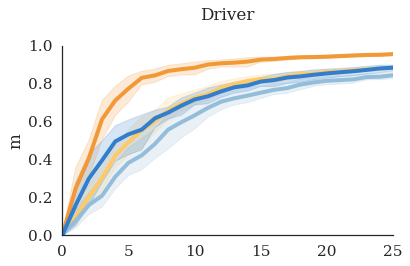

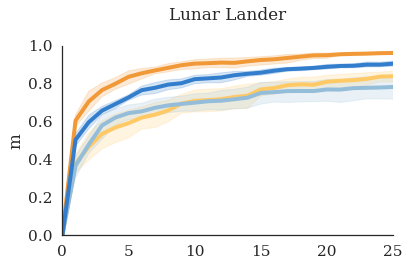

In [30]:
# optimal human
i = 0
colors = ["#F19837", "#327ECC", "#ffc966", "#94bdd9"]
palette = {}

i = 0
u_map = {"rank": "Rank", "pick_best": "Pref"}
for update_func in ["rank","pick_best"]:
    for n_query in [5, 3]:
        label = "$n_{opt}$ = " + f"{n_query}, upd. = {u_map[update_func]}"
        palette[label] = colors[i]
        i += 1

for domain in ["driver", "lander"]:
    plt.figure(i)
    set_style()
    df = pd.DataFrame(np.zeros((0,5)), columns=["run #", "pref_iter", "type", "value", "n_query/update_func"])
    d_map = {'driver': "Driver", "lander": "Lunar Lander", "fetch_move": "Fetch Reach", "fetch_push": "Fetch Push"}
    plt.title(f"{d_map[domain]}\n")
    for n_query in [5,3]:
        for update_func in ["pick_best","rank"]:
            name = f"results/domain={domain},n_query={n_query},update_func={update_func}_db.pickle"
            db = pickle.load(open(name, 'rb'), encoding='bytes')
            label = "$n_{opt}$ = " + f"{n_query}, upd. = {u_map[update_func]}"
            db["n_query/update_func"] = label
            df = df.append(db, ignore_index=True)
    m = df[df.type=='m']
    m["value"] = pd.to_numeric(m["value"])
    ax = sns.lineplot(x='pref_iter', y='value', hue="n_query/update_func", data=m, lw=4, palette=palette)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     l = plt.legend()
#     handles, labels = ax.get_legend_handles_labels()
#     leg = ax.legend(handles=handles[1:], labels=labels[1:], frameon=False)
#     for legobj in leg.legendHandles:
#         legobj.set_linewidth(3.0)
    plt.xlabel("")
    plt.ylabel("m")
    plt.xlim([0,25])
    plt.ylim([0,1])
    plt.xticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25])
    ax.get_legend().remove()
    plt.tight_layout()

    i += 1